<a href="https://colab.research.google.com/github/sadhami0519/online-retail-analytics/blob/main/data_analytics_retail_with_fireducks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install fireducks

In [ ]:
import fireducks.pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-03-22 07:20:55--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [         <=>        ]  22.62M  11.7MB/s    in 1.9s    

2025-03-22 07:20:57 (11.7 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import time
stime = time.time()

In [ ]:
df = pd.read_excel('Online Retail.xlsx', dtype = {'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string' })
df.shape

(541909, 8)

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Data Cleaning: Handle missing values



In [ ]:
df.isnull().sum() #Number of NA values per column in the dataframe

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,None,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,None,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,None,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df[df.StockCode == "23406"].Description.mode()

0    HOME SWEET HOME KEY HOLDER
Name: Description, dtype: object

In [ ]:
most_freq_desc = df[["StockCode", "Description"]].value_counts().reset_index()
most_freq_desc

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,DCGS0069,ebay,1
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,1
4789,DCGS0073,ebay,1
4790,gift_0001_20,to push order througha s stock was,1


In [ ]:
most_freq_desc[most_freq_desc.StockCode == "23406"].head(1)

,StockCode,Description,count
1431,23406,HOME SWEET HOME KEY HOLDER,114


In [ ]:
most_freq_desc = most_freq_desc.groupby("StockCode").head(1)
most_freq_desc

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4785,DCGS0068,ebay,1
4786,DCGS0069,OOH LA LA DOGS COLLAR,1
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,1
4789,DCGS0073,ebay,1


In [ ]:
most_freq_desc.columns = ["StockCode", "freqDescription", "count"]
df2 = df.merge(most_freq_desc, on = "StockCode", how = "left")
df2.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freqDescription,count
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,BAKING SET 9 PIECE RETROSPOT,974


In [ ]:
df2["Description"] = df2["freqDescription"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freqDescription,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449


In [ ]:
df2.isnull().sum()

InvoiceNo               0
StockCode               0
Description           112
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         135080
Country                 0
freqDescription       112
count                 112
dtype: int64

In [ ]:
df2.dropna(subset=["Description"], inplace=True)
df2.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         134968
Country                 0
freqDescription         0
count                   0
dtype: int64

In [ ]:
df2.describe()

,Quantity,UnitPrice,CustomerID,count
count,541797.000000,541797.000000,406829.000000,541797.000000
mean,9.555919,4.612067,15287.690570,424.567967
std,218.103428,96.769831,1713.600303,391.068884
min,-80995.000000,-11062.060000,12346.000000,1.000000
25%,1.000000,1.250000,13953.000000,151.000000
50%,3.000000,2.080000,15152.000000,303.000000
75%,10.000000,4.130000,16791.000000,573.000000
max,80995.000000,38970.000000,18287.000000,2302.000000


In [ ]:
df3 = df2[(df2.UnitPrice > 0) & (df2.Quantity > 0)]
df3.describe()

,Quantity,UnitPrice,CustomerID,count
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,424.852891
std,155.524124,35.915681,1713.141560,389.658735
min,1.000000,0.001000,12346.000000,1.000000
25%,1.000000,1.250000,13969.000000,152.000000
50%,3.000000,2.080000,15159.000000,303.000000
75%,10.000000,4.130000,16795.000000,573.000000
max,80995.000000,13541.330000,18287.000000,2302.000000


In [ ]:
req_quantile = df3['Quantity'].quantile(0.99999) #99% of the quantity values are either equal to 100 or lower than 100
req_quantile


np.float64(3164.325840001926)

In [ ]:
df3[df3.Quantity>1500].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freqDescription,count
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,ASSORTED COLOUR T-LIGHT HOLDER,126
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom,ASSORTED LAQUERED INCENSE HOLDERS,24
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom,GROW A FLYTRAP OR SUNFLOWER IN TIN,307
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
df_filtered = df[df['Quantity'] <= req_quantile]
df_filtered.describe()

,Quantity,UnitPrice,CustomerID
count,541900.000000,541900.000000,406822.000000
mean,9.195313,4.611181,15287.705893
std,157.469017,96.760655,1713.591557
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,3114.000000,38970.000000,18287.000000


#### Feature Engineering: Creating New Columns!

In [ ]:
df4 = df_filtered.copy()
df4["TotalPrice"] = df4["Quantity"] * df4["UnitPrice"]
df4[df4['Quantity'] ==3114]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.1,15749.0,United Kingdom,6539.4
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.1,15749.0,United Kingdom,6539.4


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541900 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541900 non-null  object        
 1   StockCode    541900 non-null  object        
 2   Description  540447 non-null  object        
 3   Quantity     541900 non-null  int64         
 4   InvoiceDate  541900 non-null  datetime64[ns]
 5   UnitPrice    541900 non-null  float64       
 6   CustomerID   406822 non-null  float64       
 7   Country      541900 non-null  object        
 8   TotalPrice   541900 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 41.3+ MB


In [ ]:
df4['Month'] = df4['InvoiceDate'].dt.month #Since InvoiceDate is in the DATETIME format
df4['Year'] = df4['InvoiceDate'].dt.year
df4['Year'].value_counts() #Clearly, 2011 is in the majority

Year
2011    499419
2010     42481
Name: count, dtype: int64

In [ ]:
df4['Month'].value_counts()

Month
11    84710
12    68005
10    60741
9     50226
7     39517
5     37029
6     36873
3     36748
8     35284
1     35145
4     29916
2     27706
Name: count, dtype: int64

In [ ]:
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010


#### Visualization & EDA


##### 1. Plot Monthly Sales


In [ ]:
monthly_sales = df4.groupby('Month')['TotalPrice'].sum()
monthly_sales

Month
1      482816.660
2      494859.730
3      683267.080
4      493207.121
5      720237.510
6      691123.120
7      681108.951
8      682680.510
9     1019687.622
10    1069696.670
11    1461756.250
12    1014155.430
Name: TotalPrice, dtype: float64

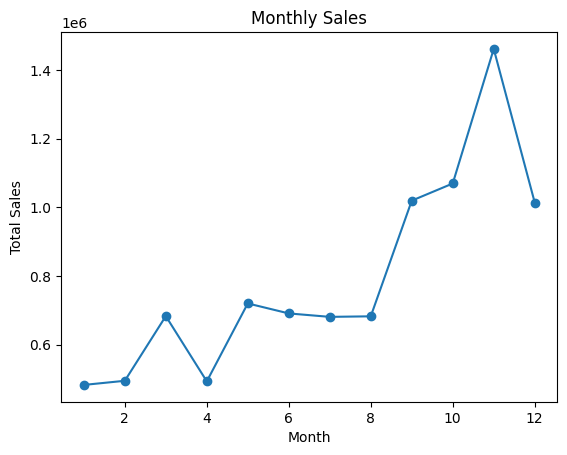

In [ ]:
monthly_sales.plot(kind='line', xlabel="Month", ylabel="Total Sales", title="Monthly Sales", marker="o")
plt.show()

###### Insight: Total Sales peak at November most likely due to the holiday season.

##### 2. Plot the first 5 countries with the Maximum Total Sales

In [ ]:
top_5_countries = df4.groupby('Country')['TotalPrice'].sum().nlargest(5)
top_5_countries

Country
United Kingdom    7934655.084
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: TotalPrice, dtype: float64

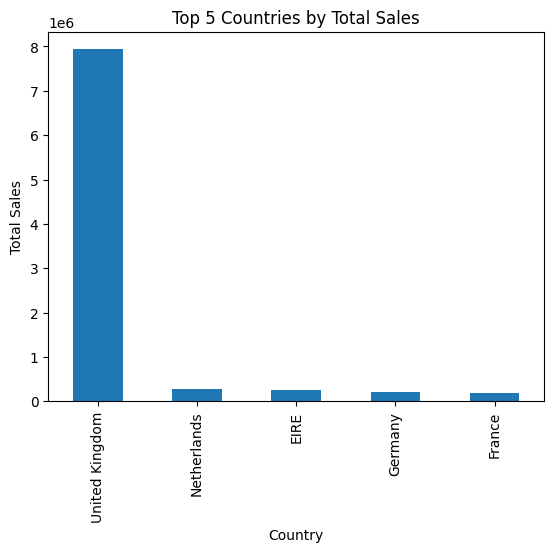

In [ ]:
top_5_countries.plot(kind="bar", xlabel="Country", ylabel="Total Sales", title="Top 5 Countries by Total Sales")
plt.show()

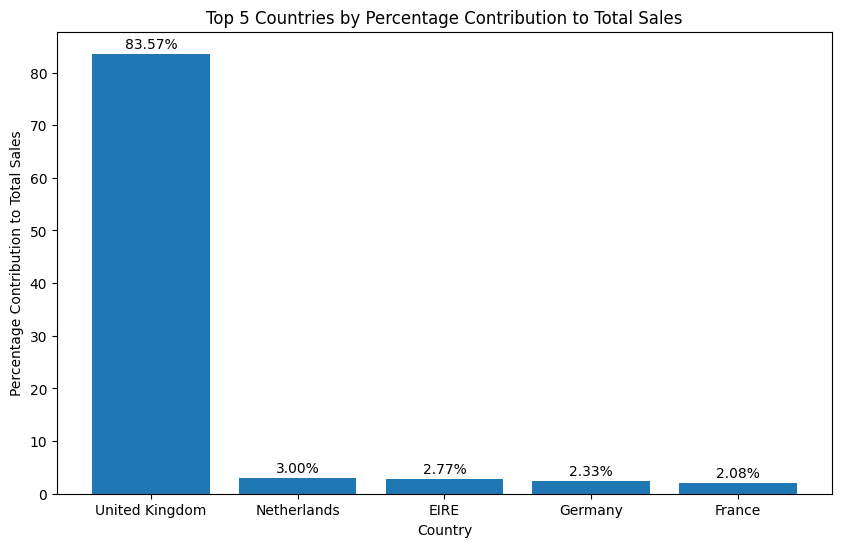

In [ ]:

total_sales = df4['TotalPrice'].sum()

country_sales = df4.groupby('Country')['TotalPrice'].sum()
percentage_contribution = (country_sales / total_sales) * 100

top_5_countries_percentage = percentage_contribution.nlargest(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_countries_percentage.index, top_5_countries_percentage.values)
plt.xlabel("Country")
plt.ylabel("Percentage Contribution to Total Sales")
plt.title("Top 5 Countries by Percentage Contribution to Total Sales")

# Display the percentage values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()


###### Insight: The UK's sales account for 83.6% of the overall total.

##### 3. Plot the first 5 products with the Maximum Total Sales

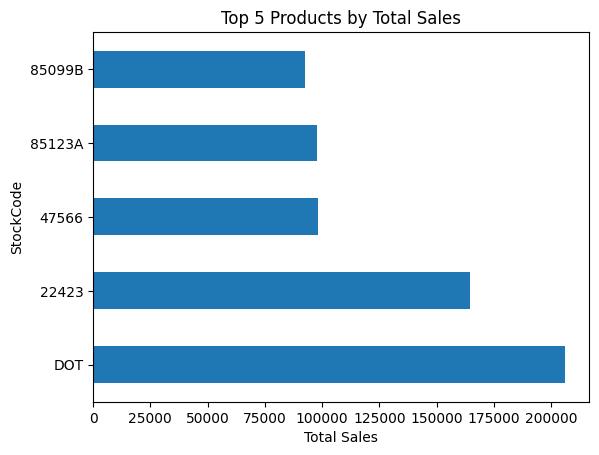

In [ ]:
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()

top_5_products = product_wise_sales.nlargest(5)
top_5_products.plot(kind="barh", xlabel="Total Sales", ylabel="StockCode", title="Top 5 Products by Total Sales")
plt.show()

In [ ]:
#Top 5 products + descriptions

for stock_code in top_5_products.index:
    product_name = df4[df4['StockCode'] == stock_code]['Description'].iloc[0]
    print(f"{stock_code} => {product_name}")

DOT => DOTCOM POSTAGE
22423 => REGENCY CAKESTAND 3 TIER
47566 => PARTY BUNTING
85123A => WHITE HANGING HEART T-LIGHT HOLDER
85099B => JUMBO BAG RED RETROSPOT


##### 4. RFM Analysis

In [ ]:
current_date = df4["InvoiceDate"].max() + pd.Timedelta(days=1)

In [ ]:
rfm = df4.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (current_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice': 'sum'
    })

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,-77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
rfm['R-Segment'] = pd.qcut(rfm['Recency'], q=5, labels=range(5, 0, -1))
rfm['F-Segment'] = pd.qcut(rfm['Frequency'], q=5, labels=range(1, 6))
rfm['M-Segment'] = pd.qcut(rfm['Monetary'], q=5, labels=range(1, 6))
rfm['RFM_Score'] = rfm[['R-Segment', 'F-Segment', 'M-Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R-Segment,F-Segment,M-Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,-77183.60,1,1,1,3
12347.0,2,182,4310.00,5,5,5,15
12348.0,75,31,1797.24,2,3,4,9
12349.0,19,73,1757.55,4,4,4,12
12350.0,310,17,334.40,1,2,2,5
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,13,176.60,5,1,1,7


In [ ]:
#Top 5 customers

rfm.sort_values('RFM_Score', ascending=False).head(5)

,Recency,Frequency,Monetary,R-Segment,F-Segment,M-Segment,RFM_Score
CustomerID,,,,,,,
12347.0,2,182,4310.00,5,5,5,15
12359.0,8,254,6245.53,5,5,5,15
12362.0,3,274,5154.58,5,5,5,15
12417.0,3,198,3578.80,5,5,5,15
12433.0,1,420,13375.87,5,5,5,15


#### 5. Customer Churn Analysis


In [ ]:
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max().dt.floor('D')

customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase


CustomerID
12346.0    326
12347.0      3
12348.0     76
12349.0     19
12350.0    311
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: InvoiceDate, Length: 4370, dtype: int64

In [ ]:
# Define Churn threshold (e.g., 90 days without purchase)
churn_threshold = 100
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers

CustomerID
12346.0    326
12350.0    311
12353.0    205
12354.0    233
12355.0    215
          ... 
18262.0    141
18268.0    135
18269.0    359
18280.0    278
18281.0    181
Name: InvoiceDate, Length: 1375, dtype: int64

Number of churned customers:  1375


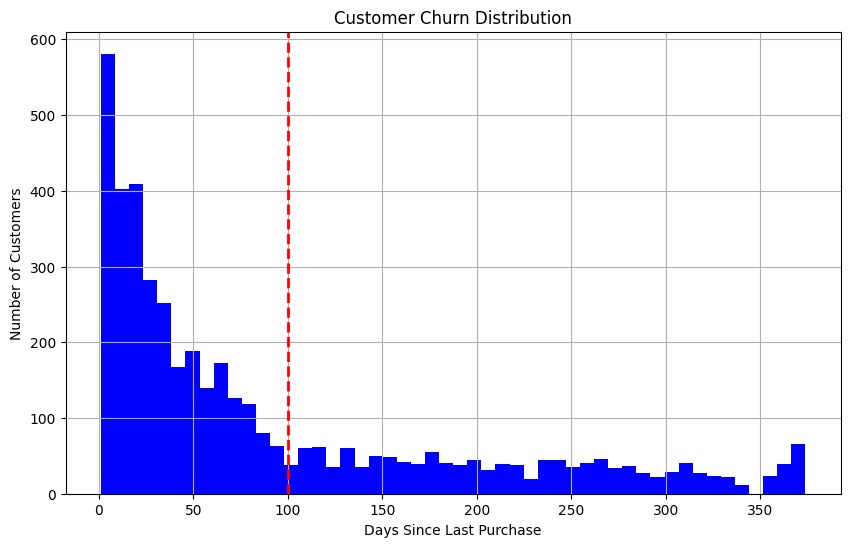

In [ ]:
print("Number of churned customers: ", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='blue')
plt.axvline(x=churn_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Churn Threshold ({churn_threshold} days)')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.grid(True)
plt.show()

In [ ]:
print(f"[{pd.__name__}] Total time taken: {time.time() - stime} sec")

[fireducks.pandas] Total time taken: 276.24591398239136 sec
